# **Projeto de Classificação dos Países**

Integrantes:
*   João Henrique de Oliveira





## Introdução
O Objetivo do projeto é classificar países em diferentes categorias/clusters a partir de dados que são fornecidos, como Inflação, PIB, Expectativa de Vida e etc.

Primeiramente, iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

Depois disso iremos importar nosso dataframe e exibir um pouco dele

In [ ]:
data = pd.read_csv('./Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Agora iremos verificar os tipos dos dados da tabela e se há algum dado faltante na tabela.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Aparentemente todos os dados estão preenchidos e apenas um dos campos do dataframe não é numerico, justamente o campo do nome do país**

Agora, irei utilizar de um grafico de correlação, para saber a relação entre determinados indíces da tabela

<Axes: >

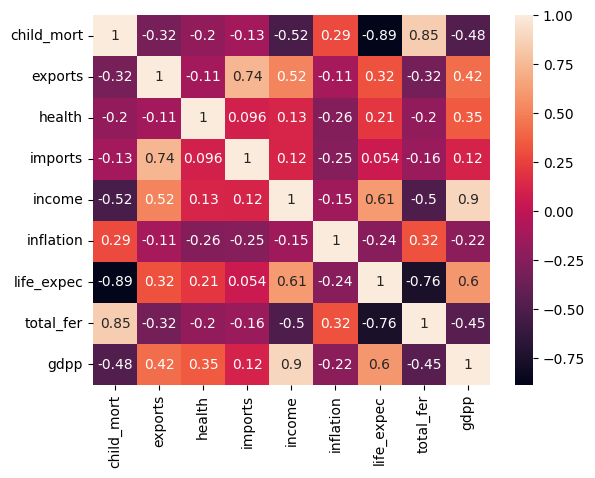

In [ ]:
data_heatmap = data.drop(['country'], axis=1)
sns.heatmap(data_heatmap.corr(), annot=True)

A partir dos indicadores que temos, iremos definir agora quais são os indices mais importantes para considerar um pais como desenvolvido, sub-desenvolvido ou emergente.
Na minha visão para os melhores indices para realizar essas divisões são:


1.   **child_mort** ,que é a taxa de mortalidade de nascimentos
2.   **Inflation**, que é a inflação do país
3.   **life_expec**, a expectativa de vida no pais em anos
4.   **GDPP**, que é o PIB per capita
5. **Income**, que é a receita média por pessoa no país (pelo que entendi)




Agora vou explicar por que selecionei esses indices para minha análise

A **health/saude**, acredito que não é um bom indice quando se trata de uma maneira geral, pois paises menores, terão um nível de saude maior, pois possuem menos pacientes, logo o gasto não é tanto para atender as demandas.

**Imports e Exports/ Importações e Exportações**, nem todo caso um país que importa mais do que exporta significa que é um pais desenvolvido, pois muitas vezes o mesmo concentra sua produção para a própria população

**total_fer/ fertilização**, alguns levam em conta isso, mas nem sempre uma família que tem poucos filhos vai ser rica, então, esse é um indice que pode variar muito, pois não existe regra certa para quantidade de filhos, isso vai do interesse de cada família.

Então iremos remover os indices que não serão considerados na tabela agora

In [ ]:
data = data.drop(['health', 'imports', 'exports', 'total_fer'], axis=1)
data.head()

,country,child_mort,income,inflation,life_expec,gdpp
0,Afghanistan,90.2,1610,9.44,56.2,553
1,Albania,16.6,9930,4.49,76.3,4090
2,Algeria,27.3,12900,16.10,76.5,4460
3,Angola,119.0,5900,22.40,60.1,3530
4,Antigua and Barbuda,10.3,19100,1.44,76.8,12200


Depois disso iremos normalizar para melhorar o desempenho do algoritmo nossos Dados:

Para isso temos que excluir o campo country também, por ser texto

In [ ]:
data = data.drop(['country'], axis=1)

scaler = MinMaxScaler().fit_transform(data)
data_scaled = pd.DataFrame(scaler, columns=data.columns)
data_scaled.head()

,child_mort,income,inflation,life_expec,gdpp
0,0.426485,0.008047,0.126144,0.475345,0.003073
1,0.068160,0.074933,0.080399,0.871795,0.036833
2,0.120253,0.098809,0.187691,0.875740,0.040365
3,0.566699,0.042535,0.245911,0.552268,0.031488
4,0.037488,0.148652,0.052213,0.881657,0.114242


Antes de pularmos para o algoritmo final poderiamos usar o PCA (Análise de Componentes Principais) que é uma prática comum em análise de dados e aprendizado de máquina, especialmente quando lidamos com conjuntos de dados de alta dimensionalidade.

Mas não utilizarei pois não entendi muito seu funcionamento e acredito que grande maioria que pegar o trabalho na internet vai usar kkkkkkk

Agora com os dados normalizados, iremos utilizar o algoritmo do Kmeans para realizar a classificação, irei utilizar ele, pois é um dos que mais se encaixa nessa situação

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

Aqui poderia ser possivel importar alguns fatores do KMeans para identificar ideais  números de clusters, porém no meu caso quero trabalhar com 4 para dividir o grupo em países desenvolvidos, sub-desenvolvidos, emergentes e situação precária.

E estou definindo a seed fixa para que nunca acha diferença nos labels que forem criados

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agora vou importar um novo dataframe para atribuir o label para cada país e depois mapea-lo para: desenvolvidos, sub-desenvolvidos, emergentes e situação precária.


Para isso precisamos descobrir, o que é cada label, o que ela representa para isso vamos criar um gráfico de dispersão

In [ ]:
data_final = pd.read_csv('./Country-data.csv')
data_final['Classe'] = labels

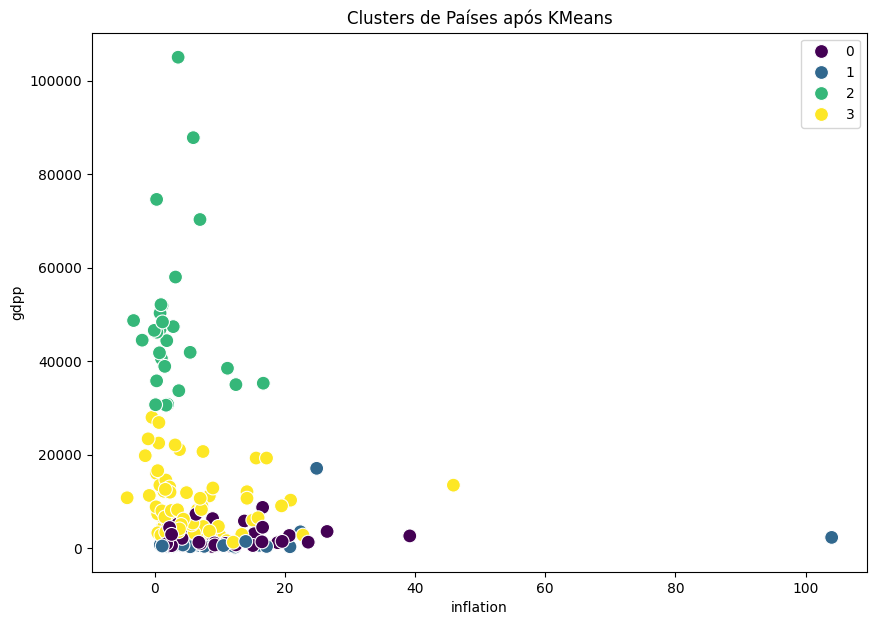

In [ ]:
# Escolher duas colunas principais para visualização
col1, col2 = data_final.columns[6], data_final.columns[9]  # Ajuste se necessário

# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_final, x=col1, y=col2, hue='Classe', palette='viridis', s=100)
plt.title('Clusters de Países após KMeans')
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend()
plt.show()

Pelo gráfico de dispersão selecionamos a inflação e o PIB para ver a relação, e aparentemente paises com rotúlo 2 são paises mais ricos e possuem inflação baixa, ou seja grande chances de serem paises desenvolvidos.
Então podemos considerar como
* 0 = Paises sub-desenvolvidos
* 1 = Paises Precários
* 2 = Paises Desenvolvidos
* 3 = Paises Emergentes

In [ ]:
data_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Classe
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


Agora aqui estou mapeando de acordo com o gráfico de dispersão que vimos e logo depois exportando para excel

In [ ]:
data_final['Classe'] = data_final['Classe'].map({0:'Sub-Desenvolvidos', 1:'Precário', 2:'Desenvolvido', 3:'Emergente'})
data_final.to_csv('data_final.csv')

In [ ]:
data_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Classe
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Precário
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Emergente
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Emergente
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Precário
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Emergente
